__Submitted by__: M. Hasnain Naeem (212728) from BSCS-7B, NUST 

# Digital Image Processing 
## Lab 6 - Histogram Processing
__Objectives:__
- To create and apply a piece-wise linear histogram transform. 
- To create and apply contrast stretching on histograms. 
- To create and apply histogram equalization. 

In [26]:
import os
import math
import numpy as np
import cv2

import matplotlib.pyplot as plt
%matplotlib inline

__Utility Functions for Common Steps__

In [27]:
def get_gray_image(name, img_dir="files/imgs"):
    # open file and convert to grey scale
    filename = os.path.join(os.curdir, img_dir, name)
    
    img = cv2.imread(filename)
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    return gray_img

In [28]:
def get_intensity_counts(gray_img):
    intensity_count = np.zeros(256, "int")
    for i, row in enumerate(gray_img):
        for j, intensity_val in enumerate(row):
            intensity_count[intensity_val] += 1
    return intensity_count

In [29]:
def plot_intensity_hists(bins, intensity_counts, saving_dir, filename):
    save_loc = os.path.join(saving_dir, filename+"_intensity_histogram"+".jpg")

    plt.bar(bins, intensity_counts, color='#0504aa')
    
    plt.grid(axis='y', alpha=0.75)
    plt.xlabel('Intensity Value')
    plt.ylabel('Intensity Value Count')
    plt.title("Intensity Value Histogram for "+filename)
    
    plt.savefig(save_loc, bbox_inches="tight", dpi=100)
    plt.show()

__Get key value pairs (image_name, img) of all the images in the given directory__

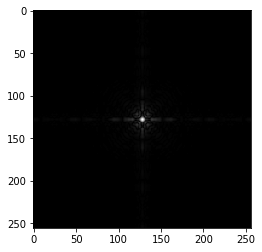

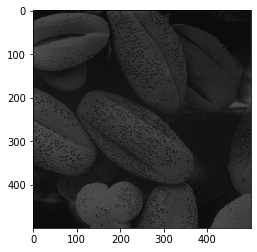

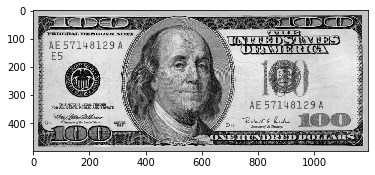

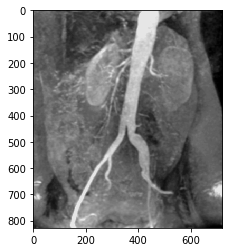

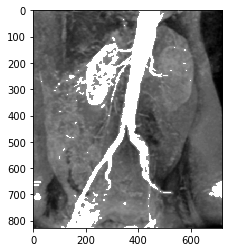

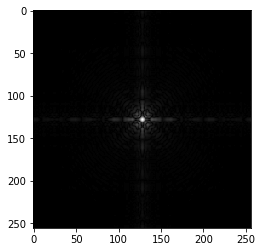

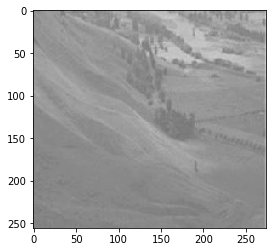

In [30]:
# get all the filenames in the directory
imgs_dir = os.path.join(os.curdir, "files", "imgs")
img_names = os.listdir("files/imgs")

# get filename --> gray_image mapping for future usage
gray_imgs = dict()
for img_name in img_names:
    gray_img = get_gray_image(img_name)
    gray_imgs[img_name] = gray_img
    plt.imshow(gray_img, cmap="gray", vmin=0, vmax=255)
    plt.show()

### Task 1
 - Loadimage “kidney.tif” 
 - Make a piece-wise function capable of isolating areas of kidney and surrounding elements. __HINT:__ This is a mask version!
 
- Apply the mask and isolate pixels from the original image. 
- Make a piece-wise function which keeps original image pixels except of range [A,B] 
- Summarize your findings with images. 
 

In [31]:
def get_transformation_mappings(trans_range, mapping_val, trans_mappings=[i for i in range(256)]):
    """
        Returns histogram transformation mappings. Use multiple times if multiple
        ranges are to be mapped to a value. 

        trans_range: tuple containing the range to be modified
        mapping_val: intensity range will be mapped to this value
        trans_range: intensity value range to be transformed. Use this argument to 
                     map multiple ranges by applying the function mutliple times
    """
    for i in range(trans_range[0], trans_range[1]):
        trans_mappings[i] = mapping_val
    return trans_mappings

In [32]:
def piece_wise_transform(img, args):
    """
        Apply piece wise transformation according to given intensity mappings and
        return the transformed image
    
    """
    transformation_mappings = args["transformation_mappings"]
    transformed_img = np.zeros(img.shape, "int")
    mask = np.zeros(img.shape, "int")


    # transform all intensities
    for i, row in enumerate(img):
        for j, val in enumerate(row):
            # transform current intensity value
            transformed_img[i, j] = transformation_mappings[val]
            if img[i, j] != transformed_img[i, j]:
                mask[i, j] = 255
            
    return transformed_img, mask

In [33]:
def transform_and_hists(img_name, gray_img, trans_func, saving_dir, **kwargs):  
    """
        Draws and saves histogram of input image. Transforms and saves the image
        according to given transformation function. Also, draws and saves histogram 
        for the transformed image.
    """
    
    print(img_name)
    print("************")
    
    print("Original Image:")
    plt.imshow(gray_img, cmap="gray")
    plt.show()
    
    bins = [i for i in range(256)]
    # plot intensity histogram
    intensity_count = get_intensity_counts(gray_img)
    plot_intensity_hists(bins, intensity_count, saving_dir, img_name)
    
    # transformation
    transformed_img, mask = trans_func(gray_img, kwargs)
    
    
    # new file name & location
    new_path = os.path.join(saving_dir, "transformed", img_name+"_transformed.jpg")
    plt.imsave(new_path, transformed_img, cmap="gray")
    
    print("Transformed Image:")
    plt.imshow(transformed_img, cmap="gray")
    plt.show()
    
    new_path = os.path.join(saving_dir, "masks", img_name+"_mask.jpg")
    plt.imsave(new_path, mask, cmap="gray")
    
    print("Mask Image:")
    plt.imshow(mask, cmap="gray")
    plt.show()

    # plot histogram of transformed image
    intensity_count = get_intensity_counts(transformed_img)
    plot_intensity_hists(bins, intensity_count, saving_dir, img_name+"_"+trans_func.__name__+"_transformed.jpg")

#### Apply Transformations on Given Images & Summarizing Results

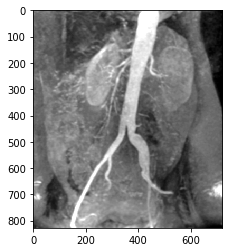

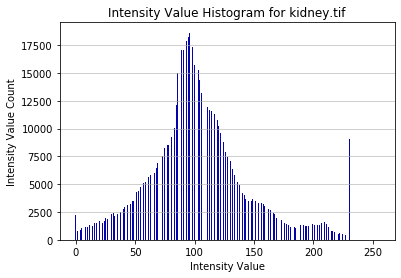

In [34]:
# open task 1 files and create directories for the transformed images
task1_dir = os.path.join(os.curdir, "files", "task1")
task1_transformed_dir = os.path.join(task1_dir, "transformed")
task1_mask_dir = os.path.join(task1_dir, "masks")

# create directories doesn't exist
if not os.path.exists(task1_dir):
    os.makedirs(task1_dir)
if not os.path.exists(task1_transformed_dir):
    os.makedirs(task1_transformed_dir)
if not os.path.exists(task1_mask_dir):
    os.makedirs(task1_mask_dir)
    
# show task 1 image
task1_img_name = "kidney.tif"
task1_img = gray_imgs[task1_img_name]
plt.imshow(task1_img, cmap="gray")
plt.show()

# plot intensity histogram
bins = [i for i in range(256)]
intensity_count = get_intensity_counts(task1_img)
plot_intensity_hists(bins, intensity_count, saving_dir=task1_dir, filename=task1_img_name)

#### Saving and Summarizing the Findings

kidney.tif
************
Original Image:


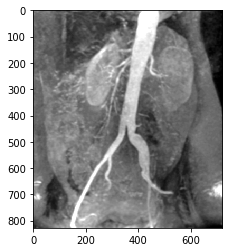

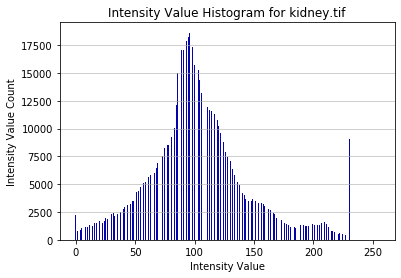

Transformed Image:


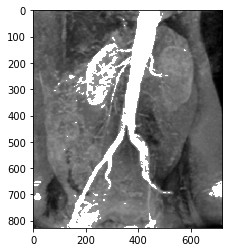

Mask Image:


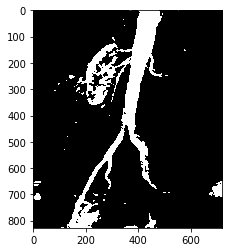

In [35]:
transformation_mappings = get_transformation_mappings((150, 255), 255)
transform_and_hists(task1_img_name, task1_img, piece_wise_transform, task1_dir, transformation_mappings=transformation_mappings)

### Task 2

- Load a low contrast image “wiki.jpg” 
- Create an algorithm which applies contrast stretching (pick any implementation you like i.e. either formula or points based) 
    
    __NOTE:__ For now, you can select the stretching limits by your own. 
- Apply same technique on “lowcon.tif” 
- Summarize your findings on how to extend or automate the task! 
 

In [36]:
# open task 2 files and create directories for the transformed images
task2_dir = os.path.join(os.curdir, "files", "task2")
task2_transformed_dir = os.path.join(task2_dir, "transformed")

# create directories doesn't exist
if not os.path.exists(task2_dir):
    os.makedirs(task2_dir) 
if not os.path.exists(task2_transformed_dir):
    os.makedirs(task2_transformed_dir)

# show task 2 image
task2_img_names = ["wiki.jpg", "lowcon.tif"]
task2_imgs ={img_name:gray_imgs[img_name] for img_name in task2_img_names}

In [37]:
def contrast_stretching_hist(hist, r_min, r_max, s_min=0, s_max=255):
    """
        Takes histogram and returns stretched histogram.
    """
    stretched_hist = np.zeros(hist.shape, "int")
    
    for r in range(r_min, r_max+1):
        s = int(round( (((s_max - s_min)/(r_max - r_min))*(r - r_min)) + s_min))
        stretched_hist[s] = hist[r] 
    return stretched_hist

In [38]:
def contrast_stretching_img(img, r_min, r_max, s_min=0, s_max=255):
    """
        Takes image and returns image with strechted contrast.
    """
    transformed_img = np.zeros(img.shape, "int")
    
    for i, row in enumerate(img):
        for j, val in enumerate(row):
             transformed_img[i, j] = int(round( (((s_max - s_min)/(r_max - r_min))*(val - r_min)) + s_min))
    return transformed_img

#### Apply Transformations on Given Images & Summarizing Results

wiki.jpg
**********
Original Image:


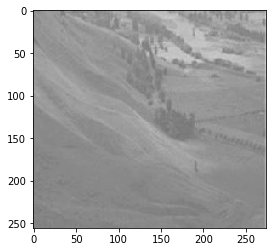

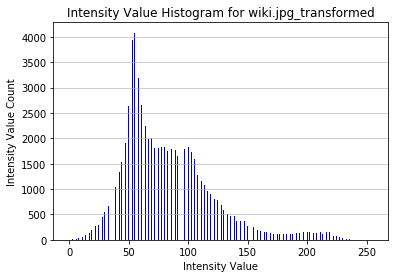

Contrast Stretched Image:


lowcon.tif
**********
Original Image:


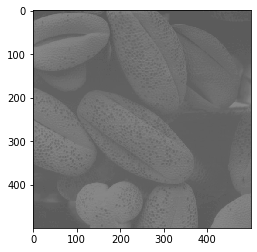

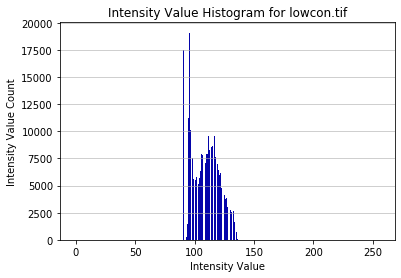

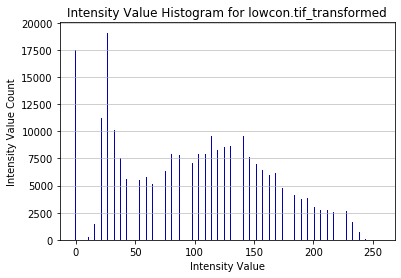

Contrast Stretched Image:


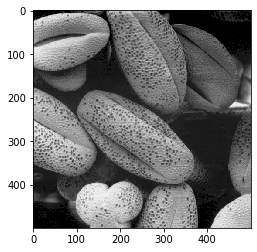

In [39]:
# iterate through the task 2 images
# apply constrast stretching
for img_name, img in task2_imgs.items():
    print(img_name)
    print("**********")
    print("Original Image:")
    plt.imshow(img, cmap="gray", vmin=0, vmax=255)
    plt.show()
    
    r_min = np.min(img)
    r_max = np.max(img)
    img_hist = get_intensity_counts(img)

    # plot original histogram
    plot_intensity_hists(bins, img_hist, task2_dir, img_name)

    # get transformed histogram
    stretched_hist = contrast_stretching_hist(img_hist, r_min, r_max)
    plot_intensity_hists(bins, stretched_hist, task2_dir, img_name+"_transformed")
    
    # transform image
    transformed_img = contrast_stretching_img(img, r_min, r_max)
    print("Contrast Stretched Image:")
    plt.imshow(transformed_img, cmap="gray", vmin=0, vmax=255)
    plt.show()
    
    # save the transformed image
    # new file name & location
    new_path = os.path.join(task2_transformed_dir, img_name+"_transformed.jpg")
    plt.imsave(new_path, transformed_img, cmap="gray")
    

### Task 3 - Histogram Equalization

- Write a program that equalizes the histogram of a given image names.
- Show the comparison of histograms before and after equalization obtained using: 
    - Your Implementation of the algorithm 
    - OpenCV’s implementation of Histogram Equalization 
- Conclude your findings on following images and analyze the workings of Histogram 
    - dark.tif 
    - bright.tif 
    - lowcon.tif 
    - Wiki.jpg 

In [40]:
# open task 3 files and create directories for the transformed images
task3_dir = os.path.join(os.curdir, "files", "task3")
task3_transformed_dir = os.path.join(task3_dir, "transformed")

# create directories doesn't exist
if not os.path.exists(task3_dir):
    os.makedirs(task3_dir) 
if not os.path.exists(task3_transformed_dir):
    os.makedirs(task3_transformed_dir)

# show task 3 image
task3_img_names = ["dark.tif", "bright.tif", "lowcon.tif", "wiki.jpg"]
task3_imgs ={img_name:gray_imgs[img_name] for img_name in task3_img_names}

In [41]:
def cummulative_sum(hist):
    a = iter(hist)
    b = [next(a)]
    for i in a:
        b.append(b[-1] + i)
    return np.array(b)

In [42]:
def histogram_equalization(img, img_hist):
    # transform image
    # execute the fn
    cs = cummulative_sum(img_hist)
    # re-normalize cumsum values to be between 0-255
    # numerator & denomenator
    nj = (cs - cs.min()) * 255
    N = cs.max() - cs.min()
    # re-normalize the cdf
    cs = nj / N
    # cast it back to uint8 since we can't use floating point values in images
    cs = cs.astype('uint8')
    transformed_img = cs[img]
    
    return transformed_img

#### Apply Transformations on Given Images & Summarizing Results

##### Using From Scratch Implementation

dark.tif
**********
Original Image:


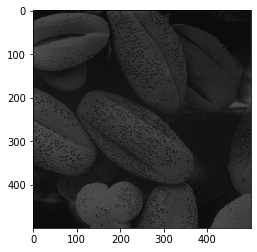

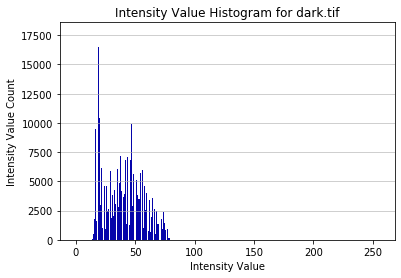

Image with Histogram Equalization:


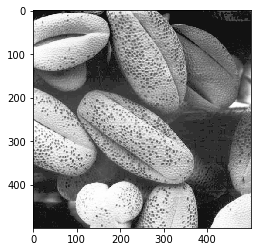

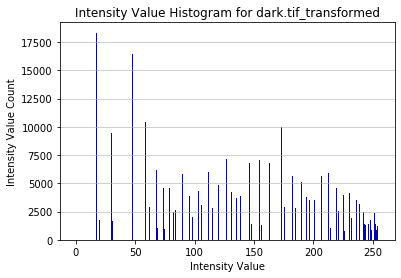

bright.tif
**********
Original Image:


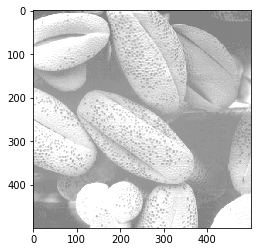

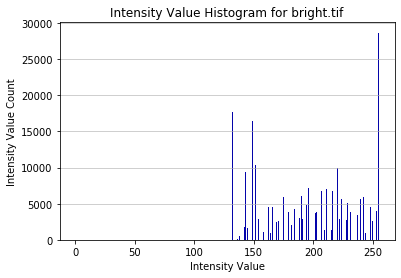

Image with Histogram Equalization:


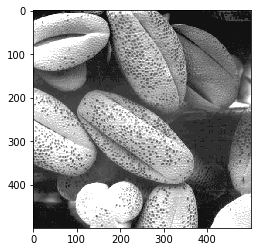

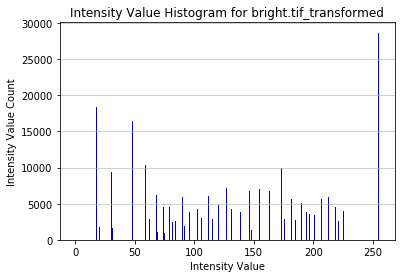

lowcon.tif
**********
Original Image:


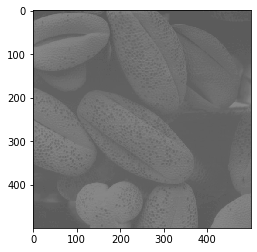

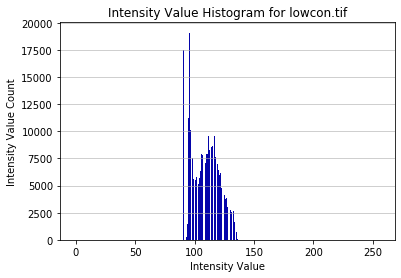

Image with Histogram Equalization:


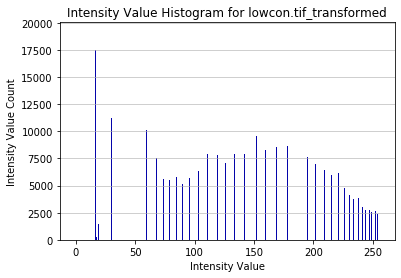

wiki.jpg
**********
Original Image:


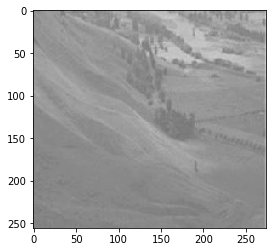

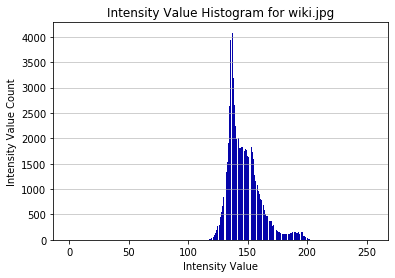

Image with Histogram Equalization:


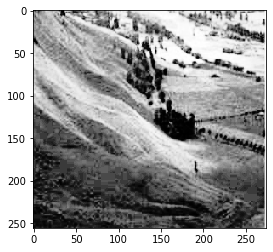

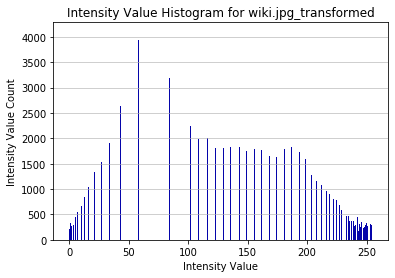

In [43]:
for img_name, img in task3_imgs.items():
    
    print(img_name)
    print("**********")
    print("Original Image:")
    plt.imshow(img, cmap="gray", vmin=0, vmax=255)
    plt.show()
    
    img_hist = get_intensity_counts(img)

    # plot original histogram
    plot_intensity_hists(bins, img_hist, task3_dir, img_name)
    transformed_img = histogram_equalization(img, img_hist)
    
    # display transformed image
    print("Image with Histogram Equalization:")
    plt.imshow(transformed_img, cmap="gray", vmin=0, vmax=255)
    plt.show()
    
    # save the transformed image
    # new file name & location
    new_path = os.path.join(task3_transformed_dir, img_name+"_transformed.jpg")
    plt.imsave(new_path, transformed_img, cmap="gray")
    
    # display and save histogram of transformed image
    transformed_img_hist = get_intensity_counts(transformed_img)
    plot_intensity_hists(bins, transformed_img_hist, task3_dir, img_name+"_transformed")

    
    

##### Using OpenCV

dark.tif
**********
Original Image:


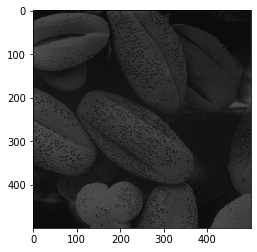

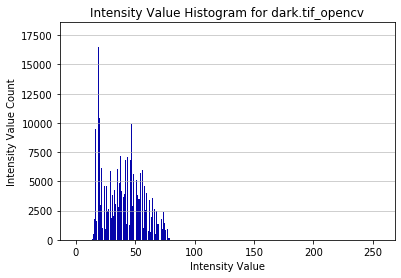

Image with Histogram Equalization:


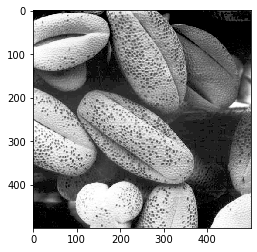

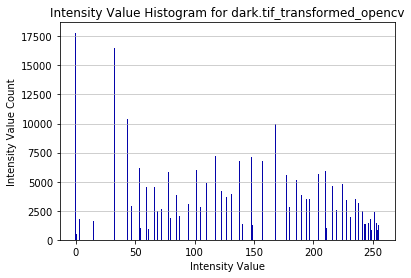

bright.tif
**********
Original Image:


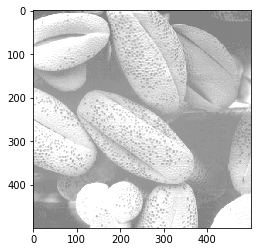

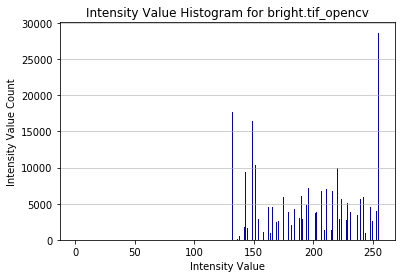

Image with Histogram Equalization:


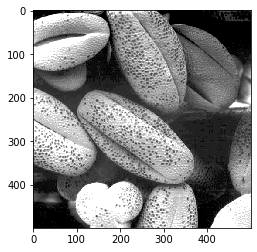

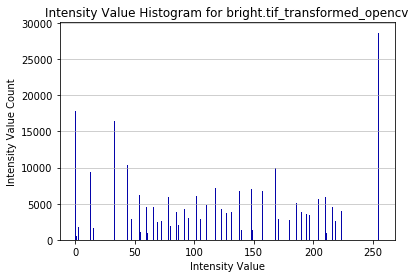

lowcon.tif
**********
Original Image:


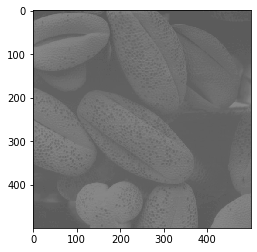

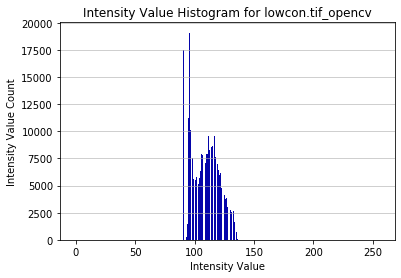

Image with Histogram Equalization:


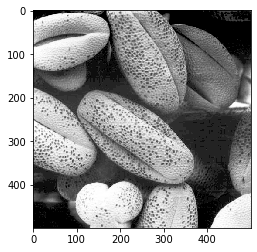

wiki.jpg
**********
Original Image:


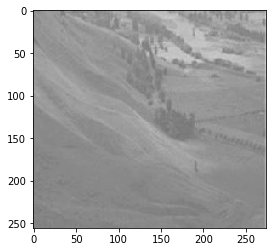

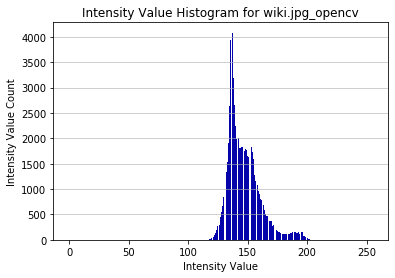

Image with Histogram Equalization:


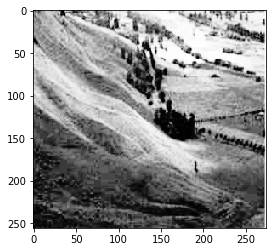

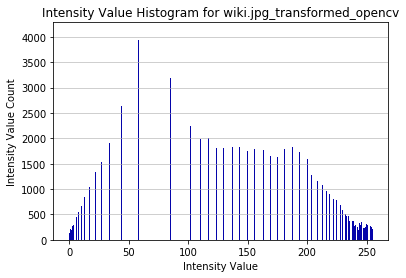

In [44]:
for img_name, img in task3_imgs.items():
    
    print(img_name)
    print("**********")
    print("Original Image:")
    plt.imshow(img, cmap="gray", vmin=0, vmax=255)
    plt.show()
    
    
    img_hist, bins_x = np.histogram(img,256,[0,256])
    # plot original histogram
    plot_intensity_hists(bins, img_hist, task3_dir, img_name+"_opencv")
    
    # apply histogram equalization
    transformed_img = cv2.equalizeHist(img)
    
    # display transformed image
    print("Image with Histogram Equalization:")
    plt.imshow(transformed_img, cmap="gray", vmin=0, vmax=255)
    plt.show()
    
    # save the transformed image
    # new file name & location
    new_path = os.path.join(task3_transformed_dir, img_name+"_transformed_opencv.jpg")
    plt.imsave(new_path, transformed_img, cmap="gray")
    
    # display and save histogram of transformed image
    transformed_img_hist = get_intensity_counts(transformed_img)
    plot_intensity_hists(bins, transformed_img_hist, task3_dir, img_name+"_transformed_opencv")    

#### Directory Structure After Completion of All Tasks

In [45]:
def list_files(startpath):
    for root, dirs, files in os.walk(startpath):
        level = root.replace(startpath, '').count(os.sep)
        indent = ' ' * 4 * (level)
        print('{}{}/'.format(indent, os.path.basename(root)))
        subindent = ' ' * 4 * (level + 1)
        for f in files:
            print('{}{}'.format(subindent, f))

__Demonstrating the elegance of the provided code__

In [46]:
list_files(os.getcwd())

Lab6/
    Lab 5 Part 2 - Histogram Processing.ipynb
    .ipynb_checkpoints/
        Lab 5 Part 2 - Histogram Processing-checkpoint.ipynb
    files/
        imgs/
            bright.tif
            corrected.png
            Corrected.tif
            dark.tif
            dollar.tif
            equalized.png
            finalBits.png
            kidney.tif
            kidneyXYZ.tiff
            lowcon.tif
            nolog.tif
            wiki.jpg
        task1/
            kidney.tif_intensity_histogram.jpg
            kidney.tif_piece_wise_transform_transformed.jpg_intensity_histogram.jpg
            kidney_intensity_histogram.jpg
            masks/
                kidney.tif_mask.jpg
            transformed/
                kidney.tif_transformed.jpg
        task2/
            kidney.tif_intensity_histogram.jpg
            kidney.tif_transformed_intensity_histogram.jpg
            lowcon.tif_intensity_histogram.jpg
            lowcon.tif_transformed_intensity_histogram.jpg
            